<br>
<img src = "https://www.finereport.com/en/wp-content/uploads/2019/12/01.jpg" width = "600"/>
<br>
<center><str><a target="_blank" href="https://www.finereport.com/en/wp-content/uploads/2019/12/01.jpg">Image Source</a></str></center>

<div class="alert alert-block alert-success">
In this notebook we will do data analysis and data cleaning, which is an important step in machine learning. We will first analyze our data, inspect missing values in it and then remove the rows containing NaN values. As most of the values in columns are of string datatype, we will convert the datatype of the values to categorical, datetime, float or int. We will also extract the meaningful information from the columns for better analysis. We will also do univariate & bivariate analysis and encode the categorical variables. At the end, we will encode our categorical columns and then decode them.</div>

# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
from datetime import datetime
import re

In [4]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from wordcloud import WordCloud, STOPWORDS

# Loading Data into the DataFrame

In [4]:
data = pd.read_csv("/kaggle/input/play-store-apps/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<div class="alert alert-block alert-info">
The following cell will output the shape or dimension of our data.</div>

In [5]:
data.shape

(10841, 13)

# Getting info about the data

<div class="alert alert-block alert-info">
<b>data.info()</b> will output the information about the data like count of non-null values in each column & the datatype of that column.</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<div class="alert alert-block alert-warning">
We can clearly see from the output above that only one column 'Rating' is in float and all the other columns are in string object. We need to convert the datatype of other columns as well.</div>

# Removing NaN values from data

<div class="alert alert-block alert-info">
Now we gonna remove missing or NaN values from the data but let's first check whether is there any NaN or missing value in our dataset.</div>

In [7]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [8]:
data.isnull().any().sum()

5

In [9]:
data[data.isnull().any(axis=1)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


<div class="alert alert-block alert-warning">
There are five columns containing NaN values. Now let's remove rows containing any NaN value. <b>data.dropna()</b> will remove the rows containing NaN value by passing <i>axis = 0</i> argument. <i>inplace = True</i> argument will perform this action in the original data.</div>

In [10]:
data.dropna(axis = 0, inplace = True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<div class="alert alert-block alert-warning">
Now let's check whether the rows containing any NaN value have been removed or not.
</div>

In [11]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [12]:
data.isnull().any().sum()

0

# Creating Word-Cloud of App Column

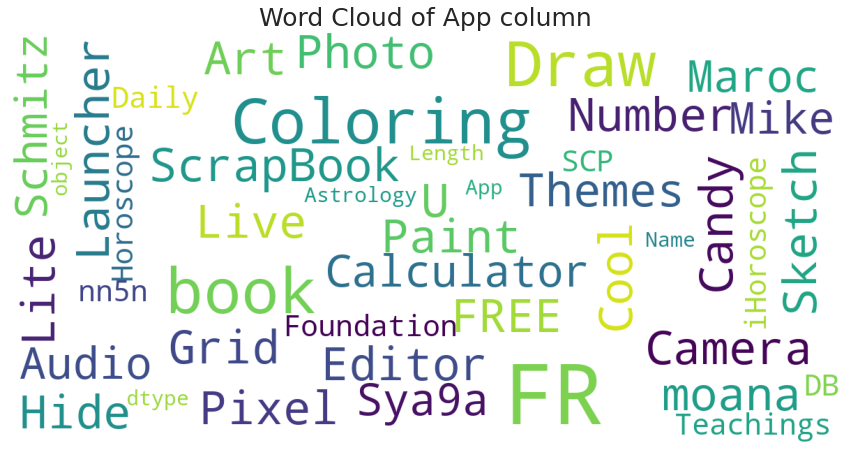

In [13]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white',
                      stopwords = stopwords,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 3,
                      random_state = 1).generate(str(data["App"]))

fig = plt.figure(1, figsize = (15, 15))
plt.axis('off')
plt.title("Word Cloud of App column", fontsize = 25)
plt.imshow(wordcloud)
plt.show()

# Converting strings to categories

<div class="alert alert-block alert-info">
As seen earlier, there are some columns containing categorical variables but stored in dataframe as string datatype. Let's convert them into categorical variables. </div>

In [14]:
# before conversion
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Category Column

<div class="alert alert-block alert-info">
Here we will first convert the values in Category column into categorical datatype and then do the univariate analysis by plotting the count of top 10 Categories.</div>

In [15]:
data["Category"] = data["Category"].astype('category')
data["Category"].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

<div class="alert alert-block alert-warning">
Now, let's plot the count of each category in Category column.
</div>

In [16]:
data["Category"].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

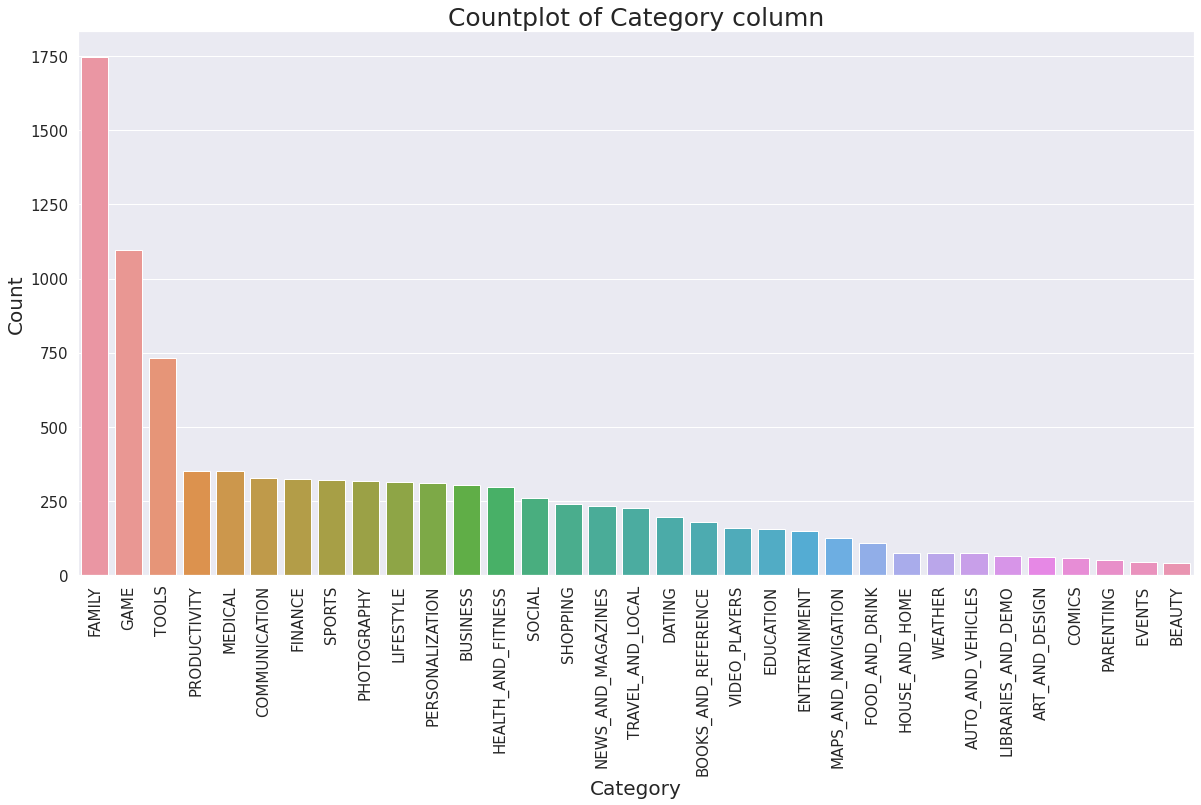

In [17]:
plt.figure(figsize = [20, 10])
sns.countplot(x = "Category", data = data, order = data["Category"].value_counts().index)
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel("Category", fontsize = 20)
plt.yticks(fontsize = 15);
plt.ylabel("Count", fontsize = 20)
plt.title("Countplot of Category column", fontsize = 25)
plt.show()

<div class="alert alert-block alert-danger">
The above plot shows us the count of Categories in Category column having Family category with the highest count.
</div>

### Type Column



In [18]:
data["Type"] = data["Type"].astype("category")
data["Type"].dtype

CategoricalDtype(categories=['Free', 'Paid'], ordered=False)

<div class="alert alert-block alert-warning">
Now, let's plot the number of types in Type column.
</div>

In [19]:
data["Type"].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

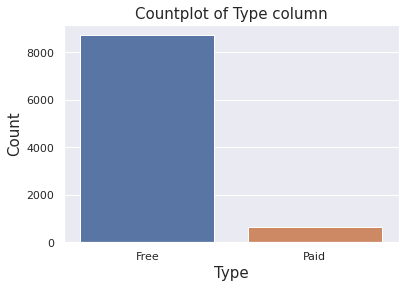

In [20]:
sns.countplot(x = "Type", data = data)
plt.xlabel("Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Countplot of Type column", fontsize = 15)
plt.show()

<div class="alert alert-block alert-danger">
This plot shows us that the majority of apps are of Type Free with Count more than 8000 and Paid apps are in a small number with count less than 1000.
</div>

### Content Rating Column

In [21]:
data["Content Rating"] = data["Content Rating"].astype("category")
data["Content Rating"].dtype

CategoricalDtype(categories=['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
                  'Teen', 'Unrated'],
, ordered=False)

<div class="alert alert-block alert-warning">
Now, let's plot the count of each rating type in Content Rating column.
</div>

In [22]:
data["Content Rating"].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

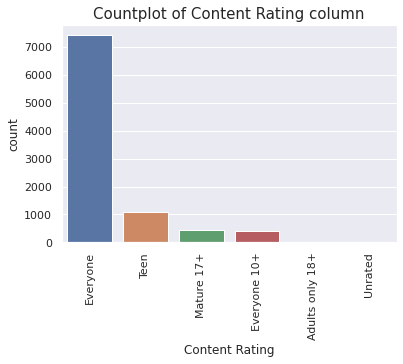

In [23]:
sns.countplot(x = "Content Rating", data = data, order = data["Content Rating"].value_counts().index)
plt.title("Countplot of Content Rating column", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-danger">
The above plot shows us that the apps which contain the content for Everyone have the highest count.
</div>

### Genres Column

In [24]:
data["Genres"] = data["Genres"].astype("category")
data["Genres"].dtype

CategoricalDtype(categories=['Action', 'Action;Action & Adventure', 'Adventure',
                  'Adventure;Action & Adventure', 'Adventure;Brain Games',
                  'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
                  'Arcade;Pretend Play', 'Art & Design',
                  ...
                  'Tools', 'Tools;Education', 'Travel & Local',
                  'Travel & Local;Action & Adventure', 'Trivia',
                  'Video Players & Editors',
                  'Video Players & Editors;Creativity',
                  'Video Players & Editors;Music & Video', 'Weather', 'Word'],
, ordered=False)

In [25]:
data["Genres"].value_counts()

Tools                          732
Entertainment                  533
Education                      468
Action                         358
Productivity                   351
                              ... 
Parenting;Brain Games            1
Health & Fitness;Education       1
Card;Brain Games                 1
Music & Audio;Music & Video      1
Role Playing;Brain Games         1
Name: Genres, Length: 115, dtype: int64

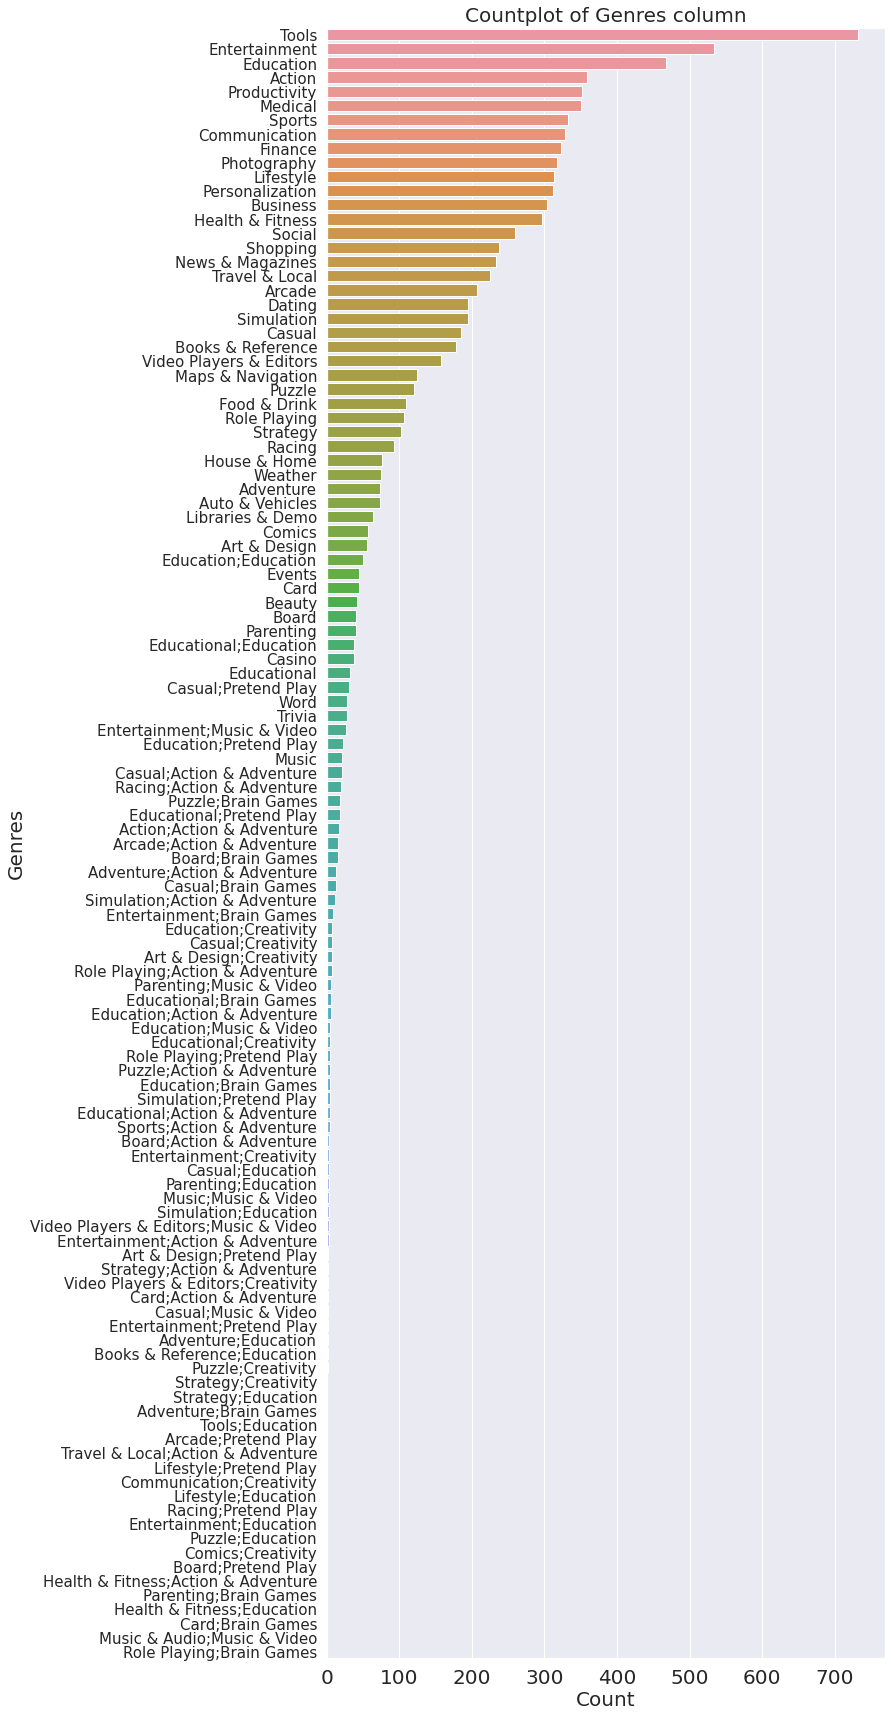

In [26]:
fig = plt.figure(figsize = [10, 30])
sns.countplot(y = "Genres", data = data, order = data["Genres"].value_counts().index)
plt.xticks(fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.yticks(fontsize = 15);
plt.ylabel("Genres", fontsize = 20)
plt.title("Countplot of Genres column", fontsize = 20)
plt.show()

<div class="alert alert-block alert-danger">
This plot shows the count of Genres with Tools having the highest count which is more than 700.
</div>

# Convertnig string to date-time

<div class="alert alert-block alert-info">
As the Last Updated column is also in string datatype, now let's convert it into data-time format.
</div>

#### Before Conversion

In [27]:
data[["Last Updated"]].head()

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [28]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"], format = "%B %d, %Y")
data["Last Updated"].dtype

dtype('<M8[ns]')

#### After Conversion

In [29]:
data[["Last Updated"]].head()

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


### Separating Date Column

<div class="alert alert-block alert-info">
Now, let's extract Year, Month and Day from Last Updated column and creating new column for each, dropping the original Last Updated column.
</div>

In [30]:
data["Year"] = data["Last Updated"].dt.year

In [31]:
data["Month"] = data["Last Updated"].dt.month

In [32]:
data["Day"] = data["Last Updated"].dt.day

In [33]:
data.drop("Last Updated", axis = 1, inplace = True)

In [34]:
data[["Year", "Month", "Day"]].head()

,Year,Month,Day
0,2018,1,7
1,2018,1,15
2,2018,8,1
3,2018,6,8
4,2018,6,20


# Strings to numbers

### Reviews Column

<div class="alert alert-block alert-info">
As Reviews column is also in string format, let's convert it into integer datatype.
</div>

#### Before Conversion

In [35]:
data[["Reviews"]].head()

,Reviews
0,159
1,967
2,87510
3,215644
4,967


In [36]:
data["Reviews"] = data["Reviews"].astype("int64")
data["Reviews"].dtype

dtype('int64')

#### After Conversion

In [37]:
data[["Reviews"]].head()

,Reviews
0,159
1,967
2,87510
3,215644
4,967


### Size Column

<div class="alert alert-block alert-info">
Let's first replace string 'Varies with device' with "5.0M" in "Size" column.</div>

#### Before Conversion

In [38]:
data[["Size"]].head()

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M


In [39]:
data["Size"] = data["Size"].replace('Varies with device', "5.0M")

In [40]:
data["Size in Numbers"] = data["Size"].apply(lambda x: re.findall(r"\d+\.\d+|\d+", x))

<div class="alert alert-block alert-warning">
Above code cell will create a new column "Size in Numbers" and the apply() function will apply regular expression to every element in the column and will return a list of string having the number in it. Now let's convert it into a number.
</div>

In [41]:
data["Size in Numbers"] = data["Size in Numbers"].apply(lambda x: "".join(x))
data["Size in Numbers"] = data["Size in Numbers"].apply(lambda x: float(x))
data["Size in Numbers"].dtype

dtype('float64')

<div class="alert alert-block alert-warning">
Now, let's create a spearate column containing the two letters either M (for Megabytes) or K (for Kilobytes) for size of the app.
</div>

In [42]:
data["Size in M or K"] = data["Size"].apply(lambda x: re.findall(r"[A-Za-z]", x))
data[["Size in M or K"]].head()

,Size in M or K
0,[M]
1,[M]
2,[M]
3,[M]
4,[M]


In [43]:
data["Size in M or K"] = data["Size in M or K"].apply(lambda x: "".join(x))
data["Size in M or K"].dtype

dtype('O')

In [44]:
# converting Size in M or K column to categorical dtype
data["Size in M or K"] = data["Size in M or K"].astype("category")
data["Size in M or K"].dtype

CategoricalDtype(categories=['M', 'k'], ordered=False)

#### After Conversion

In [45]:
data[["Size in Numbers", "Size in M or K"]].head()

,Size in Numbers,Size in M or K
0,19.0,M
1,14.0,M
2,8.7,M
3,25.0,M
4,2.8,M


In [46]:
# dropping the original Size column
data.drop("Size", inplace = True, axis = 1)

### Price Column

<div class="alert alert-block alert-info">
As Price column is also in string datatype, now let's separate the numbers from dollar sign and storing it in a new column named <b>Price in \$</b>. We will also change the datatype of values in <b>Price in \$</b> column and dropping the original Price column.
</div>

#### Before Conversion

In [47]:
data[["Price"]].head()

,Price
0,0
1,0
2,0
3,0
4,0


In [48]:
data["Price in $"] = data["Price"].apply(lambda x: re.findall(r"\d+\.\d+|\d+", x))

In [49]:
data["Price in $"] = data["Price in $"].apply(lambda x: "".join(x))

In [50]:
data["Price in $"] = data["Price in $"].astype("float64")

In [51]:
data["Price in $"].dtype

dtype('float64')

#### After Conversion

In [52]:
data[["Price in $"]].head()

,Price in $
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [53]:
data.drop("Price", inplace = True, axis = 1)

### Installs Column

<div class="alert alert-block alert-info">
The values in Installs column are of string datatype, also the numbers are spearated by commas and there's a plus sign at the end of each value. Now, let's separate numbers from the commas and plus sign and convert the datatype to integer.
</div>

#### Before Conversion

In [54]:
data[["Installs"]].head()

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"


In [55]:
data["Installs"] = data["Installs"].apply(lambda x: re.findall(r"\d+", x))

In [56]:
data["Installs"] = data["Installs"].apply(lambda x: "".join(x))

In [57]:
data["Installs"] = data["Installs"].astype("int64")

In [58]:
data["Installs"].dtype

dtype('int64')

#### After Conversion

In [59]:
data[["Installs"]].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


### Current Ver Column

<div class="alert alert-block alert-info">
Most of the values in Current Ver Column contains the combination of numbers and letters. First, we will replace string "Varies with device" with "1.0", extract a float from the combination and convert the datatype to float.
</div>

#### Before Conversion

In [60]:
data[["Current Ver"]].head()

,Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1


In [61]:
data["Current Ver"] = data["Current Ver"].replace("Varies with device", "1.0")

In [62]:
data["Current Ver"] = data["Current Ver"].apply(lambda x: re.findall(r"^(\d+\.\d+)", x))

In [63]:
data["Current Ver"] = data["Current Ver"].apply(lambda x: "".join(x))

In [64]:
data["Current Ver"] = data["Current Ver"].replace("", "1.0")

In [65]:
data["Current Ver"] = data["Current Ver"].astype("float64")

In [66]:
data["Current Ver"].dtype

dtype('float64')

#### After Conversion

In [67]:
data[["Current Ver"]].head()

,Current Ver
0,1.0
1,2.0
2,1.2
3,1.0
4,1.1


### Android Ver Column

<div class="alert alert-block alert-info">
Now, let's do the same process as did before in Current Ver column.
</div>

### Before Conversion

In [68]:
data[["Android Ver"]].head()

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up


In [69]:
data["Android Ver"] = data["Android Ver"].replace("Varies with device", "1.0")

In [70]:
data["Android Ver"] = data["Android Ver"].apply(lambda x: re.findall(r"^(\d+\.\d+)", x))

In [71]:
data["Android Ver"] = data["Android Ver"].apply(lambda x: "".join(x))

In [72]:
data["Android Ver"] = data["Android Ver"].replace("", "1.0")

In [73]:
data["Android Ver"] = data["Android Ver"].astype("float64")

In [74]:
data["Android Ver"].dtype

dtype('float64')

### After Conversion

In [75]:
data[["Android Ver"]].head()

,Android Ver
0,4.0
1,4.0
2,4.0
3,4.2
4,4.4


In [76]:
# after conversion
data.dtypes

App                  object
Category           category
Rating              float64
Reviews               int64
Installs              int64
Type               category
Content Rating     category
Genres             category
Current Ver         float64
Android Ver         float64
Year                  int64
Month                 int64
Day                   int64
Size in Numbers     float64
Size in M or K     category
Price in $          float64
dtype: object

In [77]:
data.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Year,Month,Day,Size in Numbers,Size in M or K,Price in $
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,1.0,4.0,2018,1,7,19.0,M,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2.0,4.0,2018,1,15,14.0,M,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,1.2,4.0,2018,8,1,8.7,M,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,1.0,4.2,2018,6,8,25.0,M,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,1.1,4.4,2018,6,20,2.8,M,0.0


# Bivariate Analysis

<div class="alert alert-block alert-info">
Now, let's do bivariate analysis between some columns.
</div>

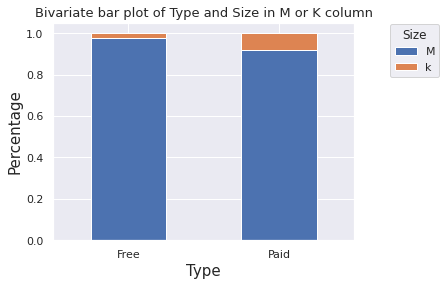

In [78]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [5, 5]
score_bin = pd.crosstab(data["Type"], data["Size in M or K"], normalize = "index")
score_bin.plot.bar(stacked = True, ax = ax)
ax.set_xlabel("Type", fontsize = 15)
ax.set_ylabel("Percentage", fontsize = 15)
plt.xticks(rotation = 0)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(title = "Size",loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.title("Bivariate bar plot of Type and Size in M or K column", fontsize = 13)
plt.show()

<div class="alert alert-block alert-danger">
The above plot shows us that the a large proportion of Free apps have their sizes in Megabytes while a very small proportion of Free apps are in Kilobytes. On the other hand, there's also a big difference in proportion of apps having sizes in M or K but in Paid Type, the proportion of apps in Kilobytes is much more than the Free apps in Kilobytes. 
</div>

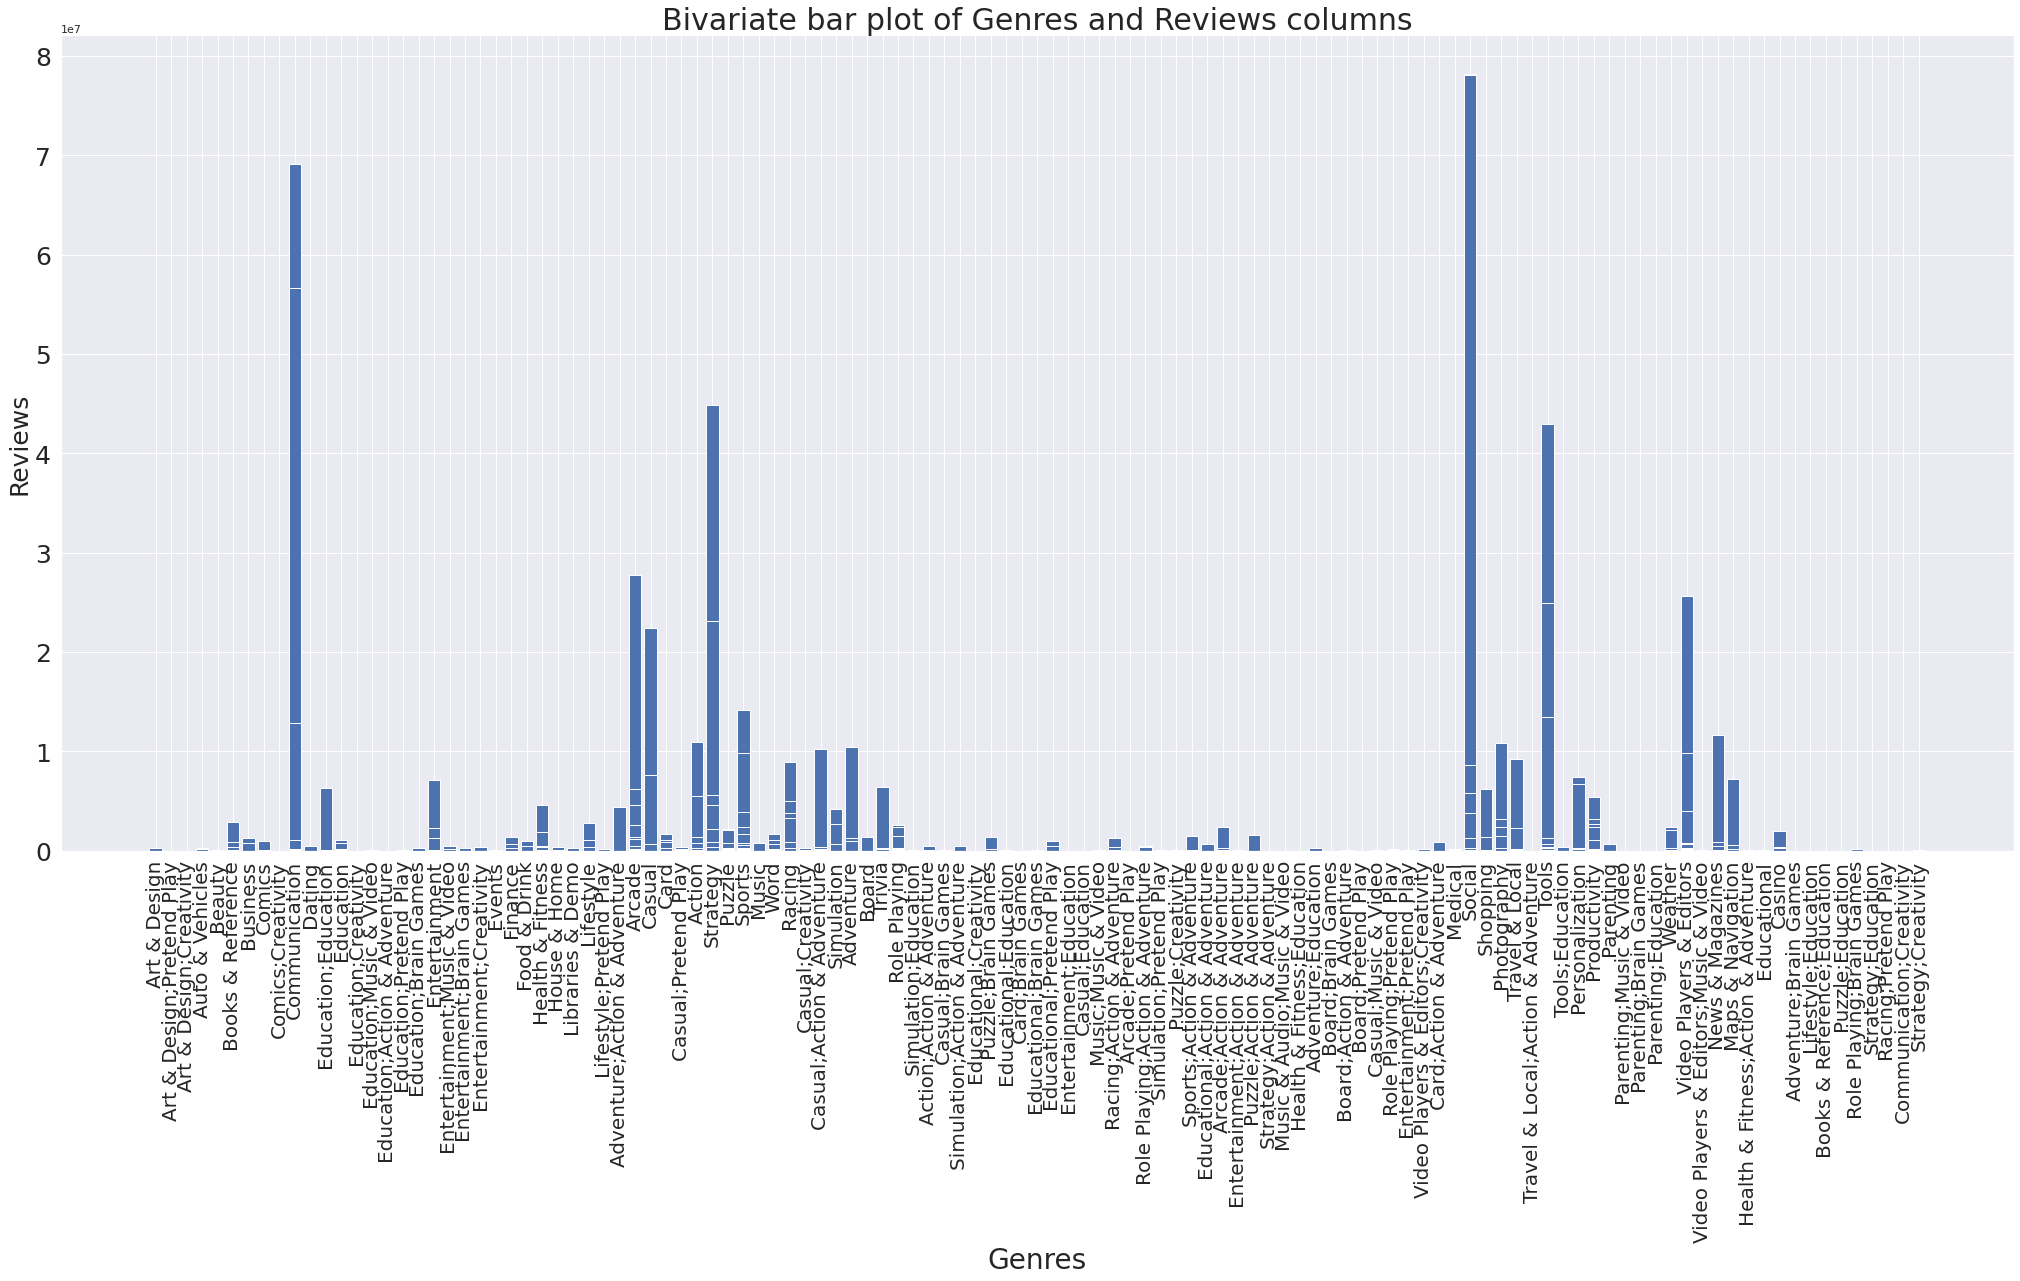

In [79]:
fig, ax = plt.subplots(figsize = [35, 15])
ax.bar(data["Genres"], data["Reviews"])
plt.xticks(rotation = 90)
plt.xlabel("Genres", fontsize = 28)
plt.ylabel("Reviews", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 25)
plt.title("Bivariate bar plot of Genres and Reviews columns", fontsize = 30)
plt.show()

<div class="alert alert-block alert-danger">
This plot shows us that the Social apps have the highest number of reviews.
</div>

In [80]:
data=data.reset_index(drop=False)

In [81]:
dummy_data = data.copy()
Q1 = np.percentile(dummy_data["Current Ver"], 25, interpolation = "midpoint")
Q3 = np.percentile(dummy_data["Current Ver"], 75, interpolation = "midpoint")

IQR = Q3 - Q1

upper = np.where(dummy_data["Current Ver"] >= (Q3 + 1.5 * IQR))
lower = np.where(dummy_data["Current Ver"] <= (Q1 - 1.5 * IQR))

dummy_data.drop(upper[0], inplace = True)
dummy_data.drop(lower[0], inplace = True)

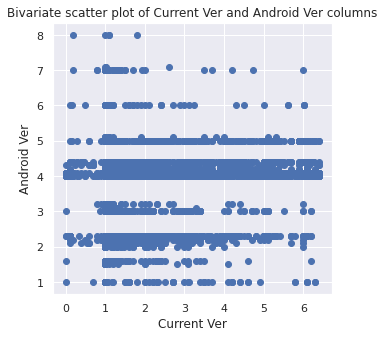

In [82]:
plt.scatter("Current Ver", "Android Ver", data = dummy_data)
plt.xlabel("Current Ver")
plt.ylabel("Android Ver")
plt.title("Bivariate scatter plot of Current Ver and Android Ver columns")
plt.show()

<div class="alert alert-block alert-danger">
We can clearly see on the above scatter plot that some of the points are overlapping which means a large number apps have their Android Ver and Current Ver somewhere around 2 and 4.</div>

In [83]:
from sklearn.preprocessing import MinMaxScaler
dummy_data = data.copy()

column1 = "Reviews"
dummy_data[column1] = MinMaxScaler().fit_transform(np.array(dummy_data[column1]).reshape(-1,1))

column2 = "Installs"
dummy_data[column2] = MinMaxScaler().fit_transform(np.array(dummy_data[column2]).reshape(-1,1))

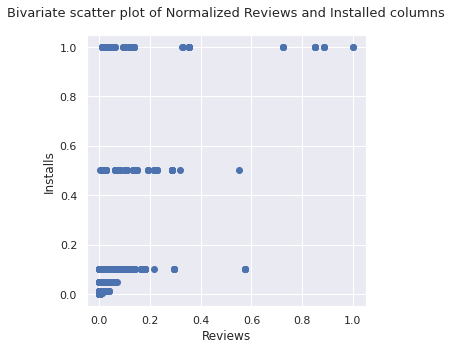

In [84]:
plt.scatter(x = "Reviews", y = "Installs", data = dummy_data)
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.title("Bivariate scatter plot of Normalized Reviews and Installed columns", fontsize = 13, pad = 18)
plt.show()

In [85]:
rev_sml = dummy_data[dummy_data["Reviews"] <= 0.2]

In [86]:
rev_lar = dummy_data[dummy_data["Reviews"] > 0.2]

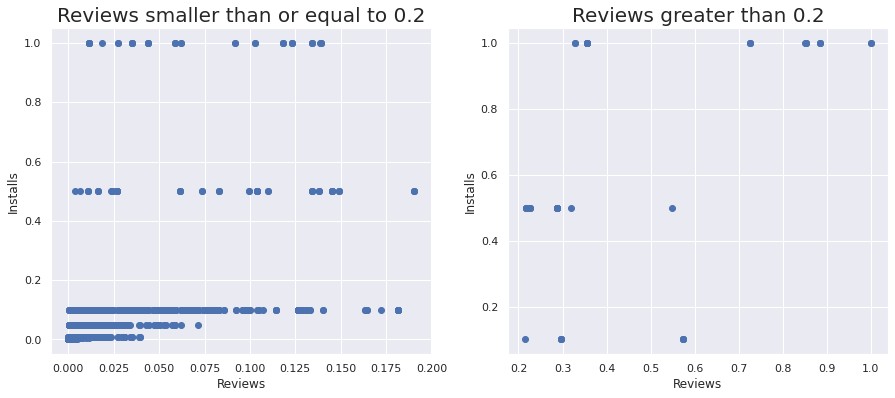

In [87]:
plt.figure(figsize = [15, 6])

# plot on left
plt.subplot(1, 2, 1)
plt.scatter(x = "Reviews", y = "Installs", data = rev_sml)
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.title("Reviews smaller than or equal to 0.2", fontsize = 20)

# plot on right
plt.subplot(1, 2, 2)
plt.scatter(x = "Reviews", y = "Installs", data = rev_lar)
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.title("Reviews greater than 0.2", fontsize = 20)

plt.show()

# Encoding And Decoding

<div class="alert alert-block alert-info">
Now let's Encode the categorical variables with Label Encoder.
</div>

In [88]:
from sklearn.preprocessing import LabelEncoder

## Encoding Category Column

In [89]:
data[["Category"]].head()

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN


In [90]:
category_label_encoder = LabelEncoder()
data["Category"] = category_label_encoder.fit_transform(data["Category"])

In [91]:
data[["Category"]].head()

,Category
0,0
1,0
2,0
3,0
4,0


## Decoding Category Column

In [92]:
data["Category"] = category_label_encoder.inverse_transform(data["Category"])

In [93]:
data[["Category"]].head()

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN


## Encoding Type Column

In [94]:
data[["Type"]].head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


In [95]:
type_label_encoder = LabelEncoder()
data["Type"] = type_label_encoder.fit_transform(data["Type"])

In [96]:
data[["Type"]].head()

,Type
0,0
1,0
2,0
3,0
4,0


## Decoding Type Column

In [97]:
data["Type"] = type_label_encoder.inverse_transform(data["Type"])

In [98]:
data[["Type"]].head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


## Encoding Content Rating Column

In [99]:
data[["Content Rating"]].head()

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone


In [100]:
content_label_encoder = LabelEncoder()
data["Content Rating"] = content_label_encoder.fit_transform(data["Content Rating"])

In [101]:
data[["Content Rating"]].head()

,Content Rating
0,1
1,1
2,1
3,4
4,1


## Decoding Content Rating Column

In [102]:
data["Content Rating"] = content_label_encoder.inverse_transform(data["Content Rating"])

In [103]:
data[["Content Rating"]].head()

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone


## Encoding Genres Column

In [104]:
data[["Genres"]].head()

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity


In [105]:
genres_label_encoder = LabelEncoder()
data["Genres"] = genres_label_encoder.fit_transform(data["Genres"])

In [106]:
data[["Genres"]].head()

,Genres
0,9
1,11
2,9
3,9
4,10


## Decoding Genres Column

In [107]:
data["Genres"] = genres_label_encoder.inverse_transform(data["Genres"])

In [108]:
data[["Genres"]].head()

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity


## Encoding Size in M or K Column

In [109]:
data[["Size in M or K"]].head()

,Size in M or K
0,M
1,M
2,M
3,M
4,M


In [110]:
size_label_encoder = LabelEncoder()
data["Size in M or K"] = size_label_encoder.fit_transform(data["Size in M or K"])

In [111]:
data[["Size in M or K"]].head()

,Size in M or K
0,0
1,0
2,0
3,0
4,0


## Decoding Size in M or K Column

In [112]:
data["Size in M or K"] = size_label_encoder.inverse_transform(data["Size in M or K"])

In [113]:
data[["Size in M or K"]].head()

,Size in M or K
0,M
1,M
2,M
3,M
4,M


In [114]:
data.head()

,index,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Year,Month,Day,Size in Numbers,Size in M or K,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,1.0,4.0,2018,1,7,19.0,M,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2.0,4.0,2018,1,15,14.0,M,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,1.2,4.0,2018,8,1,8.7,M,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,1.0,4.2,2018,6,8,25.0,M,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,1.1,4.4,2018,6,20,2.8,M,0.0


<div class="alert alert-block alert-success">
Alright! That's the end of this tutorial. If you like it then please upvote this notebook.
</div>